## Defining and training multi-layer artificial neural networks in Keras

Fortunately, the past decade has resulted in a large number of tools to efficiently work with very large, so-called deep neural networks. Among the more prominent tools are <a href="https://en.wikipedia.org/wiki/Theano_(software)">theano</a> and <a href="https://en.wikipedia.org/wiki/TensorFlow">Tensorflow</a>, from the University of Montreal and Google Inc., respectively, and the <a href="https://en.wikipedia.org/wiki/Keras">Keras</a> library to conveniently interface with them. We will be using Keras in this class to study the most important deep neural network architectures. 

Keras provides a series of standard models, the simplest being a sequential model that allows the user to stack layers of artifical neurons together:

In [5]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(2,input_dim=3,kernel_initializer='random_uniform'))

This example creates a sequential neural network with one "dense" layer with 2 artificial neurons, input dimension of 3, and uniformly random initial weights. Keras offers the following options <code>random_uniform</code>, <code>random_normal</code>, and <code>zero</code>, which are self-explanatory. Using a <i>dense</i> layer means that all inputs to a layer are connected to every neuron, and all outputs of a layer connect to all neurons of the next layer. The multi-layer perceptron shown above is a dense network.

## Training a first ANN

Example from Antonio Gulli, “Deep Learning with Keras.” The MNIST data set is a collection of 70000 hand-written digits from 0 to 9 that are provided in a 28x28 matrix. The MNIST data set is part of the ```keras.datasets``` <a href="https://keras.io/datasets/">library</a>. We will further import a simple ```Sequential``` model, creating a ```Dense``` model with custom ```Activation```, the ```SGD``` optimizer, which will be discussed later, and ```np_utils``` for One-Hot encoding.

In [3]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
np.random.seed(1671) # for reproducibility”

Using TensorFlow backend.


In [4]:
# network and training
NB_EPOCH = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = SGD() # SGD optimizer
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION

# data: shuffled and split between train and test sets
#
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
#
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

60000 train samples
10000 test samples


We can visualize the dataset using Matplotlib:

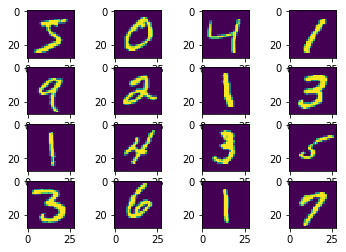

In [5]:
import matplotlib.pyplot as plt
for I in range(4):
    for J in range(4):
        plt.subplot(4,4,I*4+J+1)
        plt.imshow(X_train[I*4+J,:].reshape(28,28))
plt.show()
        
